<h1>Task 5: Decision Trees and Random Forests</h1>


<h2>Objective: Learn tree-based models for classification & regression.<br>
Tools: Tools: Scikit-learn, Graphviz</h2>


<h3>Task to be performed:</h3>
<ol>
<li>Train a Decision Tree Classifier and visualize the tree.
<li>Analyze overfitting and control tree depth.
<li>Train a Random Forest and compare accuracy.
<li>Interpret feature importances.
<li>Evaluate using cross-validation.
</ol>

<h3>Dataset:- Heart Disease Dataset downloaded from Kaggle </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import graphviz
from sklearn.tree import export_graphviz

In [3]:
#Load and Preprocess Dataset

df = pd.read_csv("heart.csv")

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h5>T-1:- Train a Decision Tree Classifier and visualize the tree.</h5>

In [4]:
#Train Decision Tree Classifier

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [5]:
# Export as Graphviz dot data
dot_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    special_characters=True
)

In [6]:
# Render tree with Graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree_heart", format="png", cleanup=False)
graph.view()

'decision_tree_heart.pdf'

In [7]:
# Evaluation
y_pred_dt = dt.predict(X_test_scaled)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))



Decision Tree Accuracy: 0.8

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



<h5>T-2:- Analyze overfitting and control tree depth.</h5>

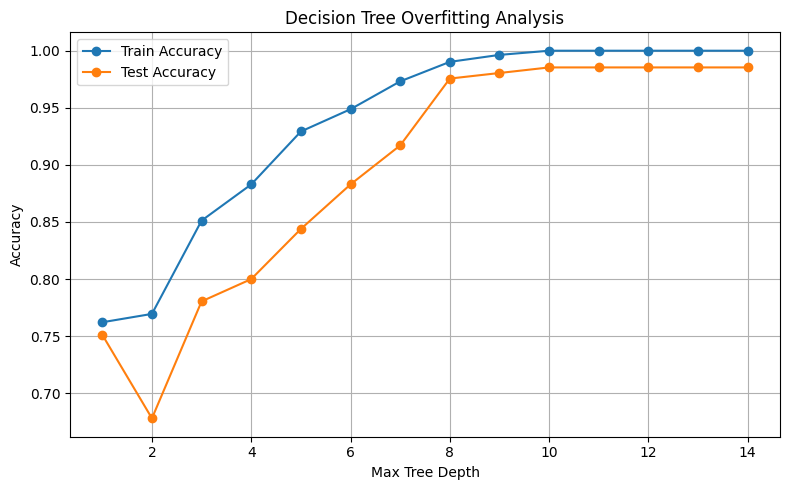

In [8]:
depths = range(1, 15)
train_acc = []
test_acc = []

for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    tree.fit(X_train_scaled, y_train)
    train_acc.append(tree.score(X_train_scaled, y_train))
    test_acc.append(tree.score(X_test_scaled, y_test))

plt.figure(figsize=(8, 5))
plt.plot(depths, train_acc, label="Train Accuracy", marker='o')
plt.plot(depths, test_acc, label="Test Accuracy", marker='o')
plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Overfitting Analysis")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<h5>T-3:- Train a Random Forest and compare accuracy.</h5>

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



<h5>T-4:- Interpret feature importances.</h5>

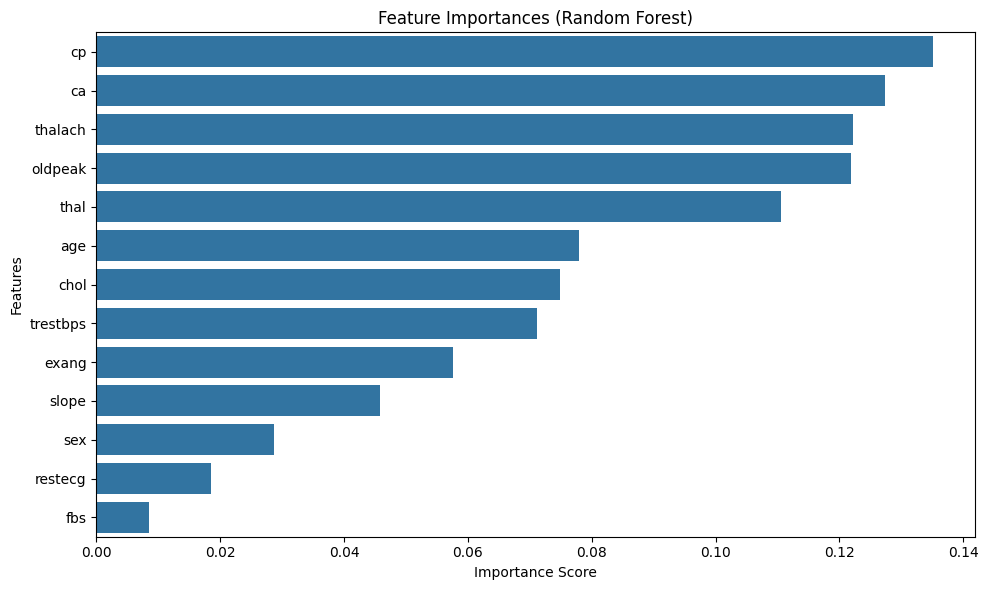

In [10]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

<h5>T-5:- Evaluate using cross-validation.</h5>

In [11]:
cv_dt = cross_val_score(dt, X, y, cv=5)
cv_rf = cross_val_score(rf, X, y, cv=5)

print(f"\nDecision Tree CV Accuracy: {cv_dt.mean():.3f}")
print(f"Random Forest CV Accuracy: {cv_rf.mean():.3f}")


Decision Tree CV Accuracy: 0.834
Random Forest CV Accuracy: 0.997
